# Use Case: Social Network Analysis
         

## Data Set
We use a [data set](https://snap.stanford.edu/data/egonets-Facebook.html) from Stanford, containing ***Facebook*** data:

### Description
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value....

In [1]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 126 (delta 11), reused 39 (delta 11), pack-reused 87
Receiving objects: 100% (126/126), 185.56 MiB | 12.90 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (86/86), done.


In [2]:
import pandas as pd

df = pd.read_csv('DATA/facebook_combined.txt')

In [3]:
df.head()


,0 1
0,0 2
1,0 3
2,0 4
3,0 5
4,0 6


Looks like the data came as a list of edges (tuple of connected node IDs) -> we have an undirected graph with no edge weights.

## Generate a Graph

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [5]:
#generate from edges
G_fb = nx.read_edgelist("DATA/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

## Get first impression of the data

In [7]:
print(G_fb)

Graph with 4039 nodes and 88234 edges


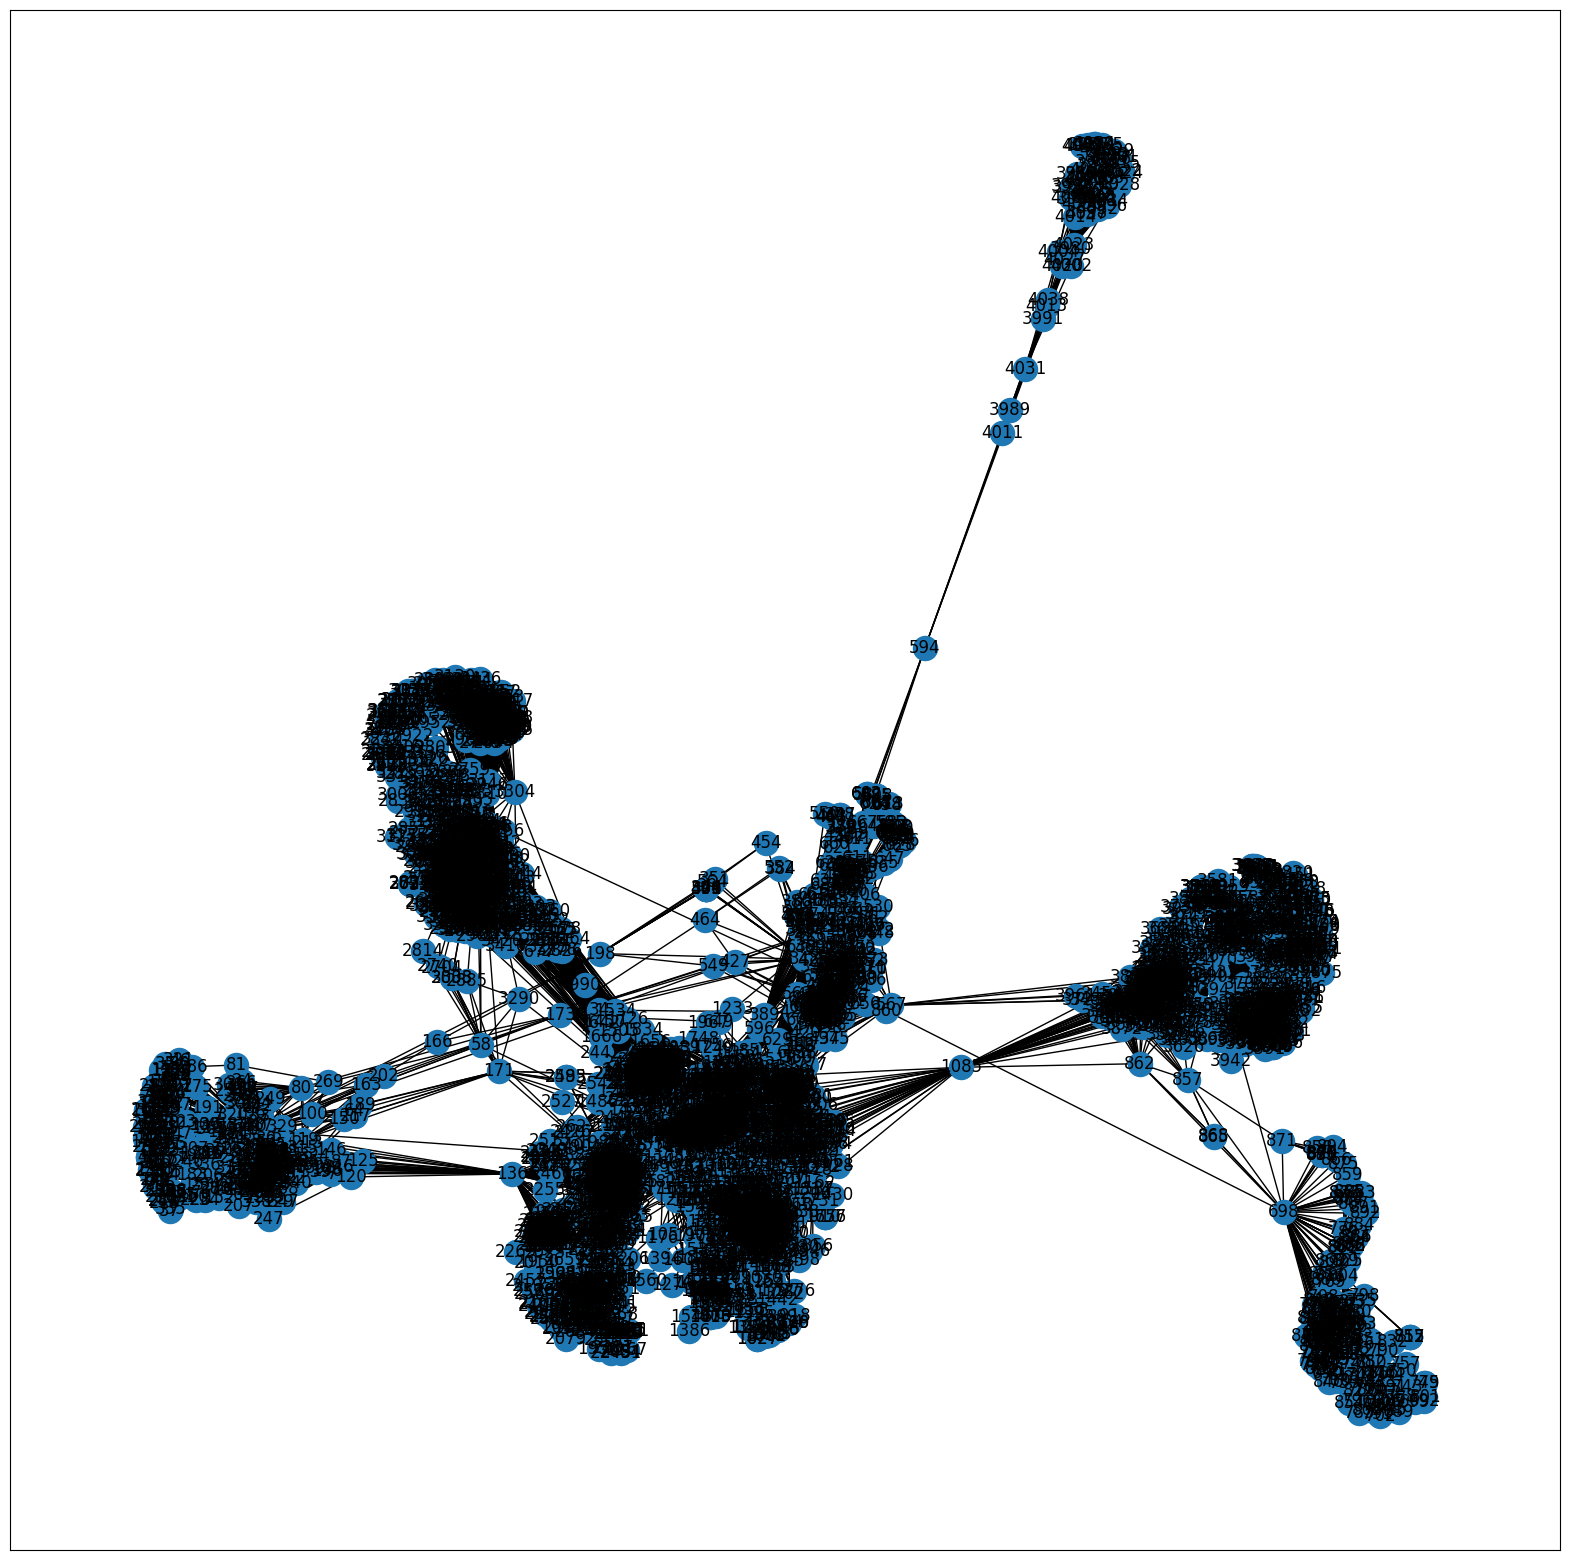

In [8]:
#plot graph - this can take some time!
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb);

## Task: find the ***Influencers*** in this Network
* Who has the most connections?
* Who should we approach when we want to spread information?

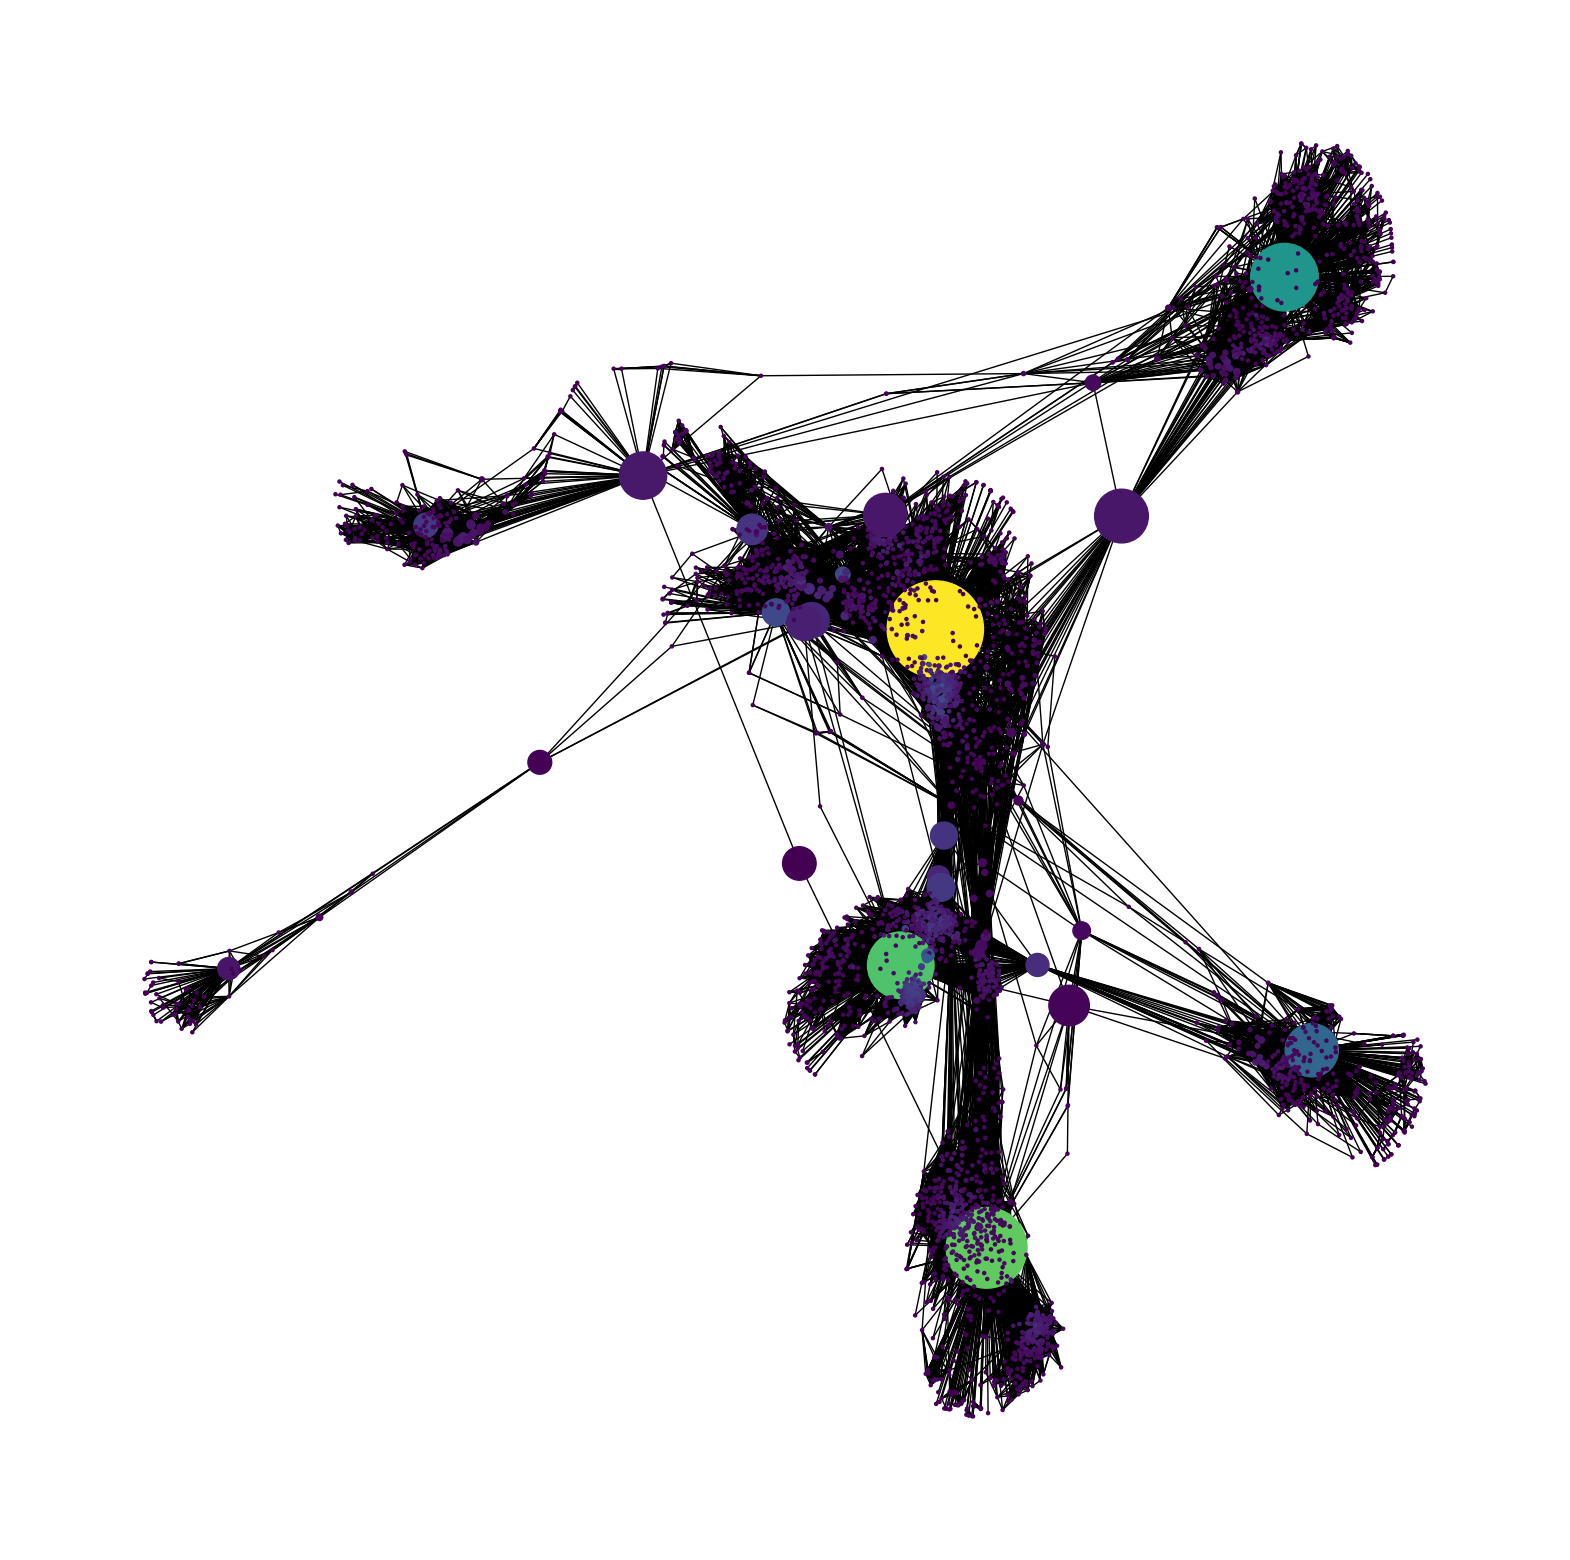

In [9]:
#visualize the centrality of nodes
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off');

In [10]:
#get list of our top5 influencers
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]